## Imports

In [1]:
# Importing revelvant Packages
library(corrplot)
library(caTools)
library(randomForest)
library(caret)

corrplot 0.92 loaded
Warning message:
"package 'caTools' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin



## importing dataset

In [2]:
# Import the dataset
df <- read.csv('stroke-data.csv')

## Understanding the Data

In [3]:
# Understanding the Data
head(df,5)

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1


In [4]:
tail(df,5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5106,18234,Female,80,1,0,Yes,Private,Urban,83.75,N/A,never smoked,0
5107,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40,never smoked,0
5108,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5109,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5110,44679,Female,44,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
nrow(df)

[1] 5110

In [6]:
ncol(df)

[1] 12

In [7]:
colnames(df)

[1] "id"                "gender"            "age"              
 [4] "hypertension"      "heart_disease"     "ever_married"     
 [7] "work_type"         "Residence_type"    "avg_glucose_level"
[10] "bmi"               "smoking_status"    "stroke"

In [8]:
any(is.na(df))

[1] FALSE

In [9]:
str(df)

'data.frame':	5110 obs. of  12 variables:
 $ id               : int  9046 51676 31112 60182 1665 56669 53882 10434 27419 60491 ...
 $ gender           : Factor w/ 2 levels "Female","Male": 2 1 2 1 1 2 2 1 1 1 ...
 $ age              : num  67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension     : int  0 0 0 0 1 0 1 0 0 0 ...
 $ heart_disease    : int  1 0 1 0 0 0 1 0 0 0 ...
 $ ever_married     : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 1 2 2 ...
 $ work_type        : Factor w/ 5 levels "children","Govt_job",..: 4 5 4 4 5 4 4 4 4 4 ...
 $ Residence_type   : Factor w/ 2 levels "Rural","Urban": 2 1 1 2 1 2 1 2 1 2 ...
 $ avg_glucose_level: num  229 202 106 171 174 ...
 $ bmi              : Factor w/ 419 levels "10.3","11.3",..: 240 419 199 218 114 164 148 102 419 116 ...
 $ smoking_status   : Factor w/ 4 levels "formerly smoked",..: 1 2 2 3 2 1 2 2 4 4 ...
 $ stroke           : int  1 1 1 1 1 1 1 1 1 1 ...


In [10]:
summary(df)

       id           gender          age         hypertension    
 Min.   :   67   Female:2995   Min.   : 0.08   Min.   :0.00000  
 1st Qu.:17741   Male  :2115   1st Qu.:25.00   1st Qu.:0.00000  
 Median :36932                 Median :45.00   Median :0.00000  
 Mean   :36518                 Mean   :43.23   Mean   :0.09746  
 3rd Qu.:54682                 3rd Qu.:61.00   3rd Qu.:0.00000  
 Max.   :72940                 Max.   :82.00   Max.   :1.00000  
                                                                
 heart_disease     ever_married         work_type    Residence_type
 Min.   :0.00000   No :1757     children     : 687   Rural:2514    
 1st Qu.:0.00000   Yes:3353     Govt_job     : 657   Urban:2596    
 Median :0.00000                Never_worked :  22                 
 Mean   :0.05401                Private      :2925                 
 3rd Qu.:0.00000                Self-employed: 819                 
 Max.   :1.00000                                                   
    

## Data Cleaning

In [11]:
df[df$bmi == 'N/A',]$bmi <- NA

In [12]:
df <- na.omit(df)

In [13]:
df$hypertension <- as.numeric(df$hypertension)
df$heart_disease <- as.numeric(df$heart_disease)
df$stroke <- as.numeric(df$stroke)
df$bmi <- as.character(df$bmi)
df$bmi <- as.numeric(df$bmi)

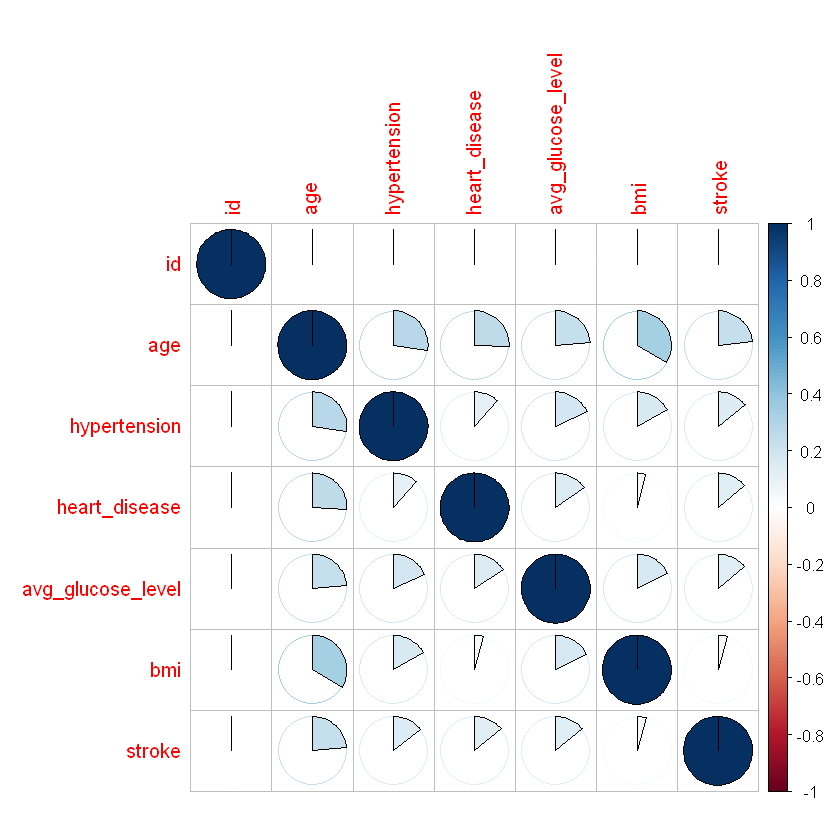

In [14]:
num.cols <- sapply(df, is.numeric)
cor.data <- cor(df[,num.cols])
corrplot(cor.data,method='pie')

In [15]:
df$bmi <- as.character(df$bmi)

In [16]:
df$bmi <- as.numeric(df$bmi)
df$hypertension <- sapply(df$hypertension,factor)
df$heart_disease <- sapply(df$heart_disease,factor)
df$stroke <- sapply(df$stroke,factor)
df$work_type <- sapply(df$work_type,factor)

In [17]:
summary(df)

       id           gender          age        hypertension heart_disease
 Min.   :   77   Female:2898   Min.   : 0.08   0:4458       1: 243       
 1st Qu.:18605   Male  :2011   1st Qu.:25.00   1: 451       0:4666       
 Median :37608                 Median :44.00                             
 Mean   :37064                 Mean   :42.87                             
 3rd Qu.:55220                 3rd Qu.:60.00                             
 Max.   :72940                 Max.   :82.00                             
 ever_married         work_type    Residence_type avg_glucose_level
 No :1705     Private      :2811   Rural:2419     Min.   : 55.12   
 Yes:3204     Self-employed: 775   Urban:2490     1st Qu.: 77.07   
              Govt_job     : 630                  Median : 91.68   
              children     : 671                  Mean   :105.31   
              Never_worked :  22                  3rd Qu.:113.57   
                                                  Max.   :271.74   
      

In [18]:
sapply(df,class)

id            gender               age      hypertension 
        "integer"          "factor"         "numeric"          "factor" 
    heart_disease      ever_married         work_type    Residence_type 
         "factor"          "factor"          "factor"          "factor" 
avg_glucose_level               bmi    smoking_status            stroke 
        "numeric"         "numeric"          "factor"          "factor"

## Balancing the data

In [19]:
df <- upSample(df[,-12],df$stroke,yname="stroke")

write.csv(df,"D:\\2nd year\\intenship\\data science\\dataset\\stroke_after.csv")

## Train Test Split

In [20]:
set.seed(7)
sample <- sample.split(df,SplitRatio = 0.7)

## Feature Scaling

In [21]:
train <- subset(df,sample == T)
test <- subset(df,sample == F)

In [22]:
nrow(train)

[1] 6267

In [23]:
nrow(test)

[1] 3133

# MODELS

## Random Forest

In [24]:
rf.model <- randomForest(stroke ~ .-id , data = train,importance = TRUE)

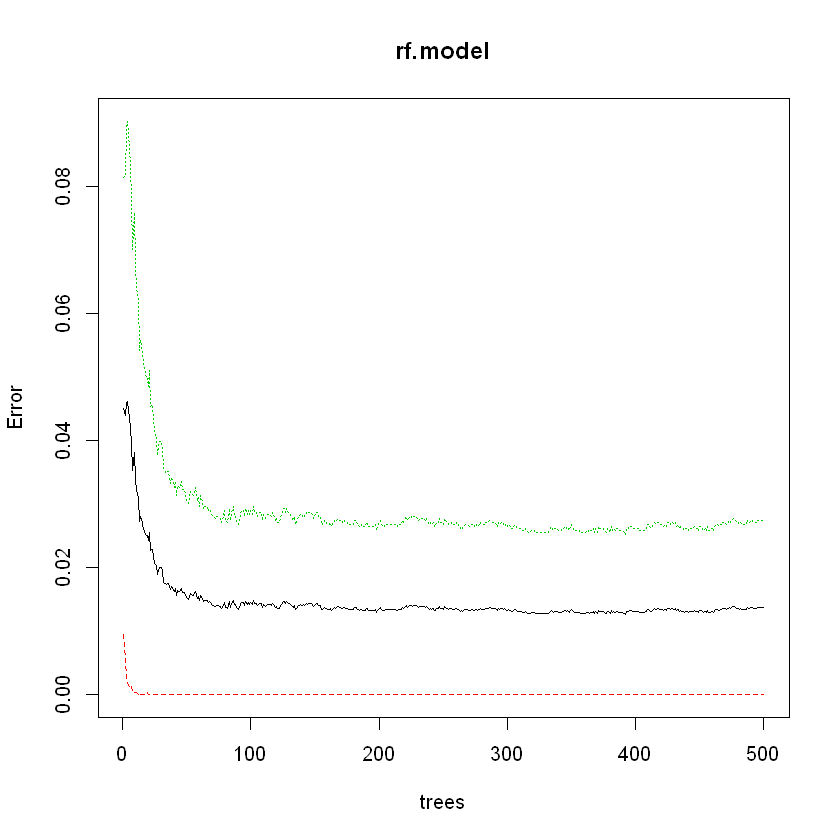

In [25]:
plot(rf.model)

In [26]:
rf.model1 <- randomForest(stroke ~ age+hypertension+heart_disease+work_type+avg_glucose_level+smoking_status ,
                          data = train,
                          ntree=300,
                          importance = TRUE,
                          proximity = TRUE)
print(rf.model1)


Call:
 randomForest(formula = stroke ~ age + hypertension + heart_disease +      work_type + avg_glucose_level + smoking_status, data = train,      ntree = 300, importance = TRUE, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 300
No. of variables tried at each split: 2

        OOB estimate of  error rate: 5.65%
Confusion matrix:
     1    0 class.error
1 3119   14  0.00446856
0  340 2794  0.10848756


In [27]:
rf.pre1 <- predict(rf.model1,test)
eva1 <- confusionMatrix(data=rf.pre1, reference = test$stroke)
print(eva1)#pre

Confusion Matrix and Statistics

          Reference
Prediction    1    0
         1 1557  193
         0   10 1373
                                         
               Accuracy : 0.9352         
                 95% CI : (0.926, 0.9436)
    No Information Rate : 0.5002         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.8704         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9936         
            Specificity : 0.8768         
         Pos Pred Value : 0.8897         
         Neg Pred Value : 0.9928         
             Prevalence : 0.5002         
         Detection Rate : 0.4970         
   Detection Prevalence : 0.5586         
      Balanced Accuracy : 0.9352         
                                         
       'Positive' Class : 1              
                                         


In [28]:
# Confusion Matrix
a1 <- table(Predictions = rf.pre1, TrueLabels = test$stroke)
print(a1)
#Accuracy
acc1 <- ( a1[2,2] + a1[1,1] ) / (length(test$stroke))
cat("Accuracy = ",acc1 )
# Precision
Precision1 =  a1[2,2] / ( a1[2,2] + a1[2,1] )
cat("\nPrecision = ",Precision1 )
# Recall
Recall1 =  a1[2,2] / ( a1[2,2] + a1[1,2] )
cat("\nRecall = ",Recall1 )
# F1-score
F1score1  = 2*(Recall1 * Precision1) / (Recall1 + Precision1)
cat("\nF1 score = ",F1score1 )

           TrueLabels
Predictions    1    0
          1 1557  193
          0   10 1373
Accuracy =  0.9352059
Precision =  0.9927693
Recall =  0.8767561
F1 score =  0.9311631

## Confusion Matrix

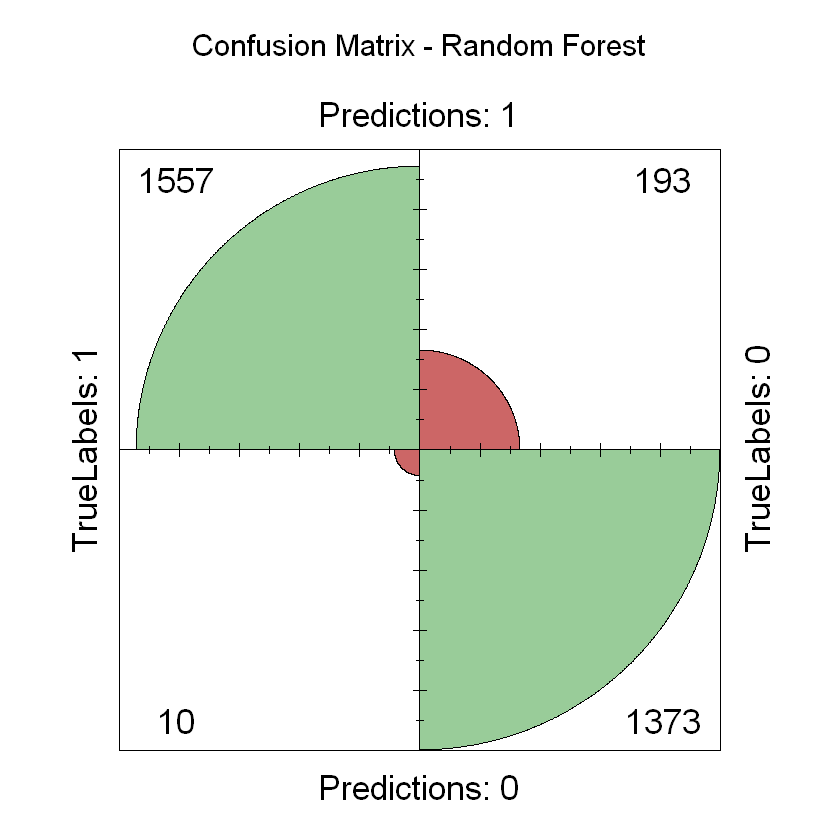

In [29]:
fourfoldplot(a1, color = c("#CC6666", "#99CC99"),conf.level = 0, margin = 1, main = "Confusion Matrix - Random Forest")

## Logistic Regression

In [30]:
glm.model = glm(stroke ~ age+hypertension+heart_disease+work_type+avg_glucose_level+smoking_status,
                family = binomial(link = 'logit'),
                data = train)
summary(glm.model)


Call:
glm(formula = stroke ~ age + hypertension + heart_disease + work_type + 
    avg_glucose_level + smoking_status, family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.49031  -0.72377   0.00134   0.69472   2.56189  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 4.580e+00  2.203e-01  20.795  < 2e-16 ***
age                        -7.707e-02  2.487e-03 -30.991  < 2e-16 ***
hypertension1              -7.383e-01  8.756e-02  -8.432  < 2e-16 ***
heart_disease0              3.370e-01  1.109e-01   3.037  0.00239 ** 
work_typeSelf-employed      4.404e-01  8.388e-02   5.250 1.52e-07 ***
work_typeGovt_job           1.930e-01  9.256e-02   2.085  0.03706 *  
work_typechildren          -8.188e-01  2.908e-01  -2.816  0.00486 ** 
work_typeNever_worked       1.010e+01  1.471e+02   0.069  0.94526    
avg_glucose_level          -4.752e-03  6.185e-04  -7.682 

In [31]:
glm.pre = predict(glm.model, newdata=test, type="response")
pre <- ifelse(glm.pre > 0.5,1,0)
pre <- as.factor(pre)
levels(pre) <- c(1,0)
glm.eva <- confusionMatrix(data=pre, reference = test$stroke)
glm.eva

Confusion Matrix and Statistics

          Reference
Prediction    1    0
         1 1264  406
         0  303 1160
                                          
               Accuracy : 0.7737          
                 95% CI : (0.7586, 0.7883)
    No Information Rate : 0.5002          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5474          
                                          
 Mcnemar's Test P-Value : 0.0001278       
                                          
            Sensitivity : 0.8066          
            Specificity : 0.7407          
         Pos Pred Value : 0.7569          
         Neg Pred Value : 0.7929          
             Prevalence : 0.5002          
         Detection Rate : 0.4034          
   Detection Prevalence : 0.5330          
      Balanced Accuracy : 0.7737          
                                          
       'Positive' Class : 1               
                        

In [32]:
# Confusion Matrix
a1 <- table(Predictions = rf.pre1, TrueLabels = test$stroke)
print(a1)
#Accuracy
acc1 <- ( a1[2,2] + a1[1,1] ) / (length(test$stroke))
cat("Accuracy = ",acc1 )
# Precision
Precision1 =  a1[2,2] / ( a1[2,2] + a1[2,1] )
cat("\nPrecision = ",Precision1 )
# Recall
Recall1 =  a1[2,2] / ( a1[2,2] + a1[1,2] )
cat("\nRecall = ",Recall1 )
# F1-score
F1score1  = 2*(Recall1 * Precision1) / (Recall1 + Precision1)
cat("\nF1 score = ",F1score1 )

           TrueLabels
Predictions    1    0
          1 1264  406
          0  303 1160
Accuracy =  0.7736993
Precision =  0.7928913
Recall =  0.7407407
F1 score =  0.7659293

## Confusion Matrix

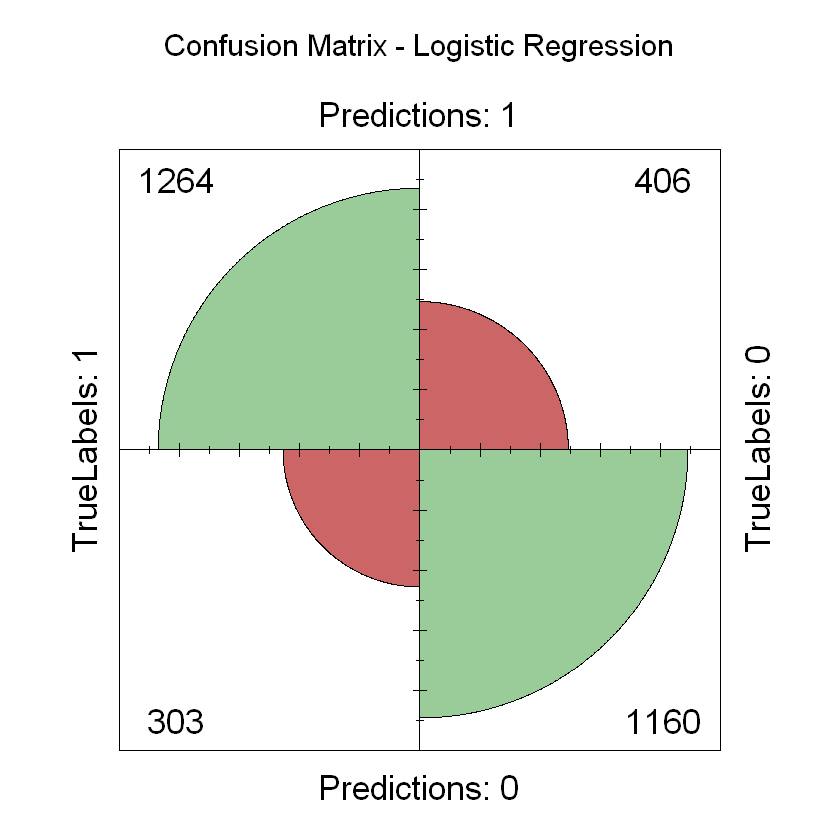

In [33]:
fourfoldplot(a1, color = c("#CC6666", "#99CC99"),conf.level = 0, margin = 1, main = "Confusion Matrix - Logistic Regression")